In [1]:
#!pip install neuralprophet

In [2]:
#!pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5

In [3]:
#!pip uninstall prophet torchaudio torchtext torchvision torchdata

In [4]:
from neuralprophet import NeuralProphet

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Define the tickers for the ETFs
tickers = ['GOOGL', 'MSFT', 'AAPL', 'AMZN']

# Fetch historical data from Yahoo Finance
data = yf.download(tickers, start="2006-01-01", end="2020-04-30")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%%**********************]  4 of 4 completed


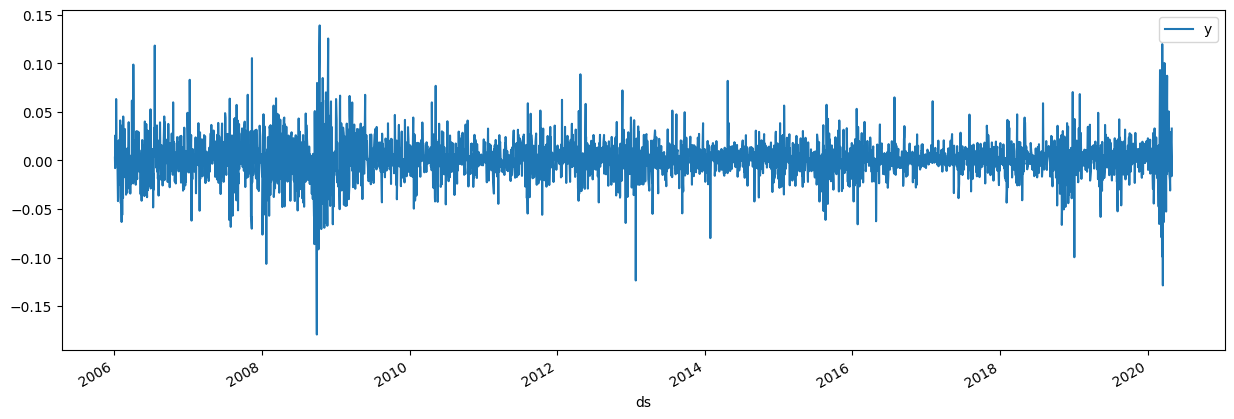

In [6]:
df = returns[['AAPL']].reset_index()
df.columns = ['ds', 'y']
plt = df.plot(x="ds", y="y", figsize=(15, 5))

In [7]:
df = returns[['AAPL']].reset_index()
df.columns = ['ds', 'y']

# Split the data into training and testing sets chronologically
train_size = int(len(df) * 0.80)
df_train = df[:train_size]
df_test = df[train_size:]

In [8]:
#predicted_returns

In [9]:
import yfinance as yf
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np

# Fetch historical data
tickers = ['GOOGL', 'MSFT', 'AAPL', 'AMZN']
data = yf.download(tickers, start="2006-01-01", end="2020-04-30")['Adj Close']

# Function to process data, train model, and forecast
def forecast_stock(stock_name):
    # Prepare data
    df = pd.DataFrame(data[stock_name].pct_change().dropna()).reset_index()
    df.columns = ['ds', 'y']

    # Split the data into training and testing sets
    train_size = int(len(df) * 0.80)
    df_train = df[:train_size]
    df_test = df[train_size:]

    # Train the model
    model = NeuralProphet()
    model.fit(df_train, freq='D')

    # Make predictions
    future = model.make_future_dataframe(df_train, periods=len(df_test))
    forecast = model.predict(future)

    return forecast['yhat1'].values

# Forecasting for each stock and collecting predictions
all_forecasts = []
for ticker in tickers:
    forecast_values = forecast_stock(ticker)
    all_forecasts.append(forecast_values)

# Convert the list of forecasts to a NumPy array
final_forecast_array = np.array(all_forecasts).T

# final_forecast_array will be in the format [[0.25045896, 0.2512192, ...], ...]


[*********************100%%**********************]  4 of 4 completed

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.


INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 142
INFO:NP.config:Auto-set epochs to 142
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number                     for the learning rate finder (236). The results might not be optimal.


Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonalit

Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonalit

Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonalit

Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.393% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.393% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [10]:
final_forecast_array

array([[-4.2638490e-01, -3.3728388e-01, -4.9121037e-02, -1.1056408e-02],
       [-2.7844262e-01, -2.5617611e-01, -1.6737995e-01,  1.4283687e-01],
       [ 2.6539713e-04,  9.2744827e-04,  1.8377900e-03,  1.2798607e-03],
       ...,
       [ 1.6253293e-03,  1.1352450e-03, -4.4861436e-04,  1.5031993e-03],
       [ 3.8713217e-04,  1.0610148e-03, -1.7069727e-03,  3.6319047e-03],
       [ 6.0444325e-04,  8.3334744e-04, -2.9975921e-03,  2.8613508e-03]],
      dtype=float32)

In [11]:
import cvxpy as cp
def optimize_portfolio_based_on_predictions(predicted_returns):

    n = len(tickers)  # Number of stocks
    weights = cp.Variable(n)

    # Objective: Maximize predicted return
    predicted_portfolio_return = predicted_returns @ weights
    objective = cp.Maximize(predicted_portfolio_return)

    # Constraints
    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    return weights.value

# For each prediction, optimize the portfolio
optimized_weights = np.array([optimize_portfolio_based_on_predictions(pred) for pred in final_forecast_array ])

optimized_weights_proph = optimized_weights.mean(axis=0)

In [12]:
optimized_weights_proph

array([0.18307921, 0.02081173, 0.13938241, 0.65672664])

In [13]:
def calculate_sharpe_ratio(returns, weights, risk_free_rate, covariance_matrix):
    """
    Calculate the Sharpe Ratio for a portfolio.

    :param returns: List of expected returns for each asset.
    :param weights: List of weights for each asset in the portfolio.
    :param risk_free_rate: The risk-free rate.
    :param covariance_matrix: Covariance matrix of the returns of the assets.
    :return: Sharpe Ratio of the portfolio.
    """
    # Convert lists to numpy arrays for vectorized operations
    returns = np.array(returns)
    weights = np.array(weights)

    # Calculate the expected portfolio return
    portfolio_return = np.mean(weights * returns*252)

    # Calculate the portfolio variance
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))

    # Calculate the portfolio standard deviation (volatility)
    portfolio_std_dev = np.sqrt(portfolio_variance*252)

    # Calculate the Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    return sharpe_ratio

# Example usage
data = yf.download(tickers, start="2006-01-01", end="2020-04-30")['Adj Close']

returns = data.pct_change().dropna()

train_size = int(len(returns) * 0.80)

returns_example = returns.iloc[train_size:]  # Example returns for three assets

risk_free_rate_example = 0.0019                # Example risk-free rate
covariance_matrix_example = returns.iloc[train_size:].cov() # Example covariance matrix

# Calculate the Sharpe Ratio
sharpe_ratio_proph = calculate_sharpe_ratio(returns_example, optimized_weights_proph,
                                              risk_free_rate_example, covariance_matrix_example)

[*********************100%%**********************]  4 of 4 completed


In [14]:
sharpe_ratio_proph

0.2887181651559567

In [15]:
# Traditional Method

# Assuming 'returns' is a pandas DataFrame of historical returns
expected_returns = returns.mean().values  # Convert to numpy array
cov_matrix = returns.cov().values  # Convert to numpy array

# Ensure that 'weights' is a column vector with the same number of rows as there are assets
weights = cp.Variable(expected_returns.shape[0])

# Define the optimization problem
risk_free_rate = 0.01  # Example risk-free rate
objective = cp.Maximize(expected_returns.T @ weights - risk_free_rate - cp.quad_form(weights, cov_matrix))
constraints = [cp.sum(weights) == 1, weights >= 0]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimal weights
optimal_weights_mpt = weights.value

In [16]:
# Initial investment
initial_investment = 1000

# Allocate the initial investment according to the weights
investment_mpt = initial_investment * np.array(optimal_weights_mpt)
investment_proph = initial_investment * np.array(optimized_weights_proph)

In [17]:

# Function to calculate portfolio value over time
def calculate_portfolio_value_over_time(investment, daily_returns):
    # Calculate cumulative returns for each day
    cumulative_returns = np.cumprod(1 + daily_returns, axis=0)

    # Calculate daily portfolio value
    portfolio_values = np.sum(investment * cumulative_returns, axis=1)

    return portfolio_values

# Calculate portfolio values over time for both MPT and LSTM methods
portfolio_values_mpt = calculate_portfolio_value_over_time(investment_mpt, returns.iloc[train_size:])
portfolio_values_proph = calculate_portfolio_value_over_time(investment_proph, returns.iloc[train_size:])



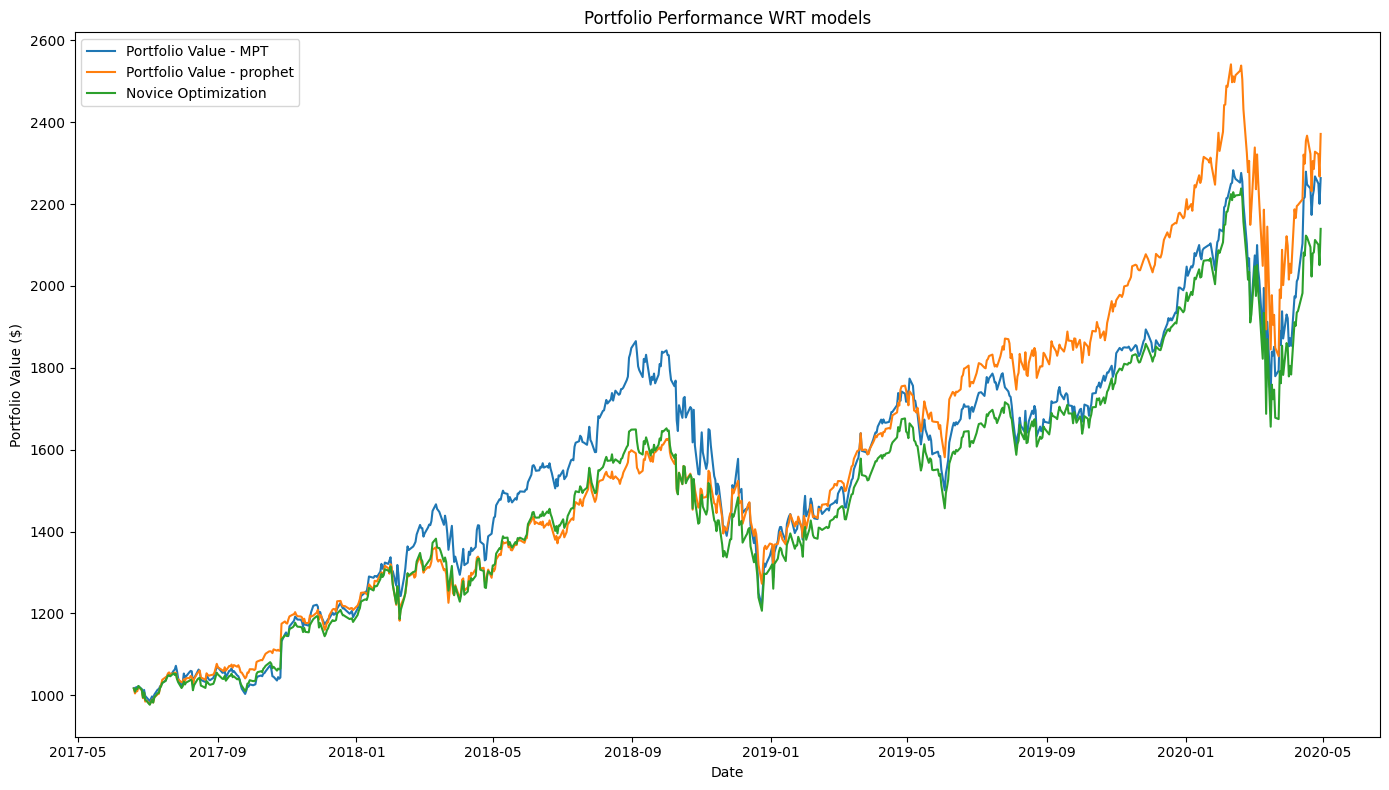

In [19]:
import matplotlib.pyplot as plt

num_days_test = len(df_test)  # For demonstration, using the length of y_test_sample

# Creating a time axis for the plot
days = np.arange(1, num_days_test + 1)


# Actual return values
cumulative_returns = (1 + returns.iloc[train_size:]).cumprod()
actual_portfolio_values = ((initial_investment/4) * cumulative_returns).sum(axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot the LSTM and MPT model values
ax.plot(portfolio_values_mpt.index, portfolio_values_mpt, label='Portfolio Value - MPT')
ax.plot(portfolio_values_proph.index, portfolio_values_proph, label='Portfolio Value - prophet')
ax.plot(actual_portfolio_values.index, actual_portfolio_values, label='Novice Optimization')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value ($)')
ax.set_title('Portfolio Performance WRT models')

# Add legend
ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()


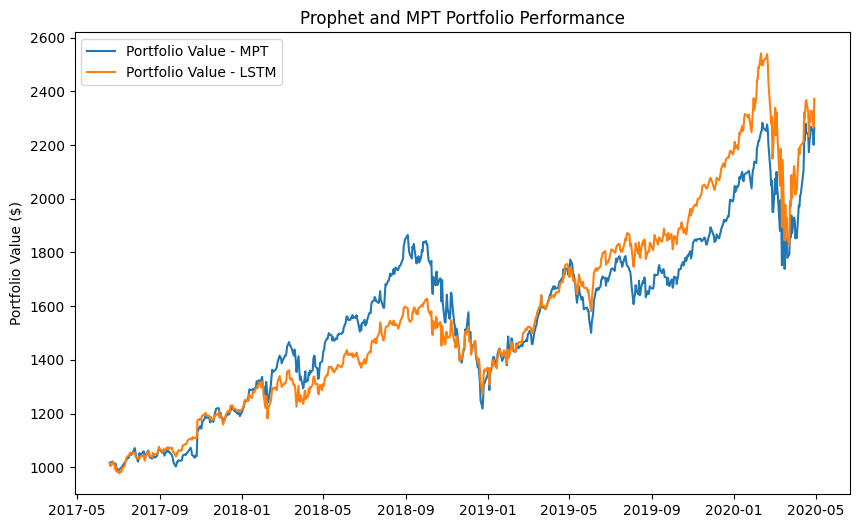

In [25]:
num_days_test = len(df_test)  # For demonstration, using the length of y_test_sample

# Creating a time axis for the plot
days = np.arange(1, num_days_test + 1)


# Actual return values
cumulative_returns = (1 + returns.iloc[train_size:]).cumprod()
actual_portfolio_values = ((initial_investment/4) * cumulative_returns).sum(axis=1)

# Assuming 'portfolio_values_mpt' and 'portfolio_values_proph' are your data series

plt.figure(figsize=(10, 6))

# Plot the MPT and LSTM model values
plt.plot(portfolio_values_mpt.index, portfolio_values_mpt, label='Portfolio Value - MPT')
plt.plot(portfolio_values_proph.index, portfolio_values_proph, label='Portfolio Value - LSTM')

# Setting labels and title
plt.ylabel('Portfolio Value ($)')
plt.title('Prophet and MPT Portfolio Performance')

# Adding a legend
plt.legend()

# Show the plot
plt.show()
